# Data Visualization with Seaborn

Before we start, we need to install seaborn. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%autosave 0

Autosave disabled


Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

**Adult Census Income**

Predict whether income exceeds $50K/yr based on census data

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
len(df)

32561

In order to better illustrate some of the plots, let's sample only 500 observations. But you shouldn't do it in the project.

In [5]:
df=df.sample(500,random_state=1)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [7]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.044819,-0.003402,0.068986,0.067976,0.088779
fnlwgt,-0.044819,1.000000,0.014280,-0.035879,-0.058480,-0.019102
education.num,-0.003402,0.014280,1.000000,0.128262,0.143796,0.194980
capital.gain,0.068986,-0.035879,0.128262,1.000000,-0.026987,0.023619
capital.loss,0.067976,-0.058480,0.143796,-0.026987,1.000000,0.052463
hours.per.week,0.088779,-0.019102,0.194980,0.023619,0.052463,1.000000


In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.67200,189034.854000,10.098000,611.436000,90.550000,40.142000
std,14.29269,108084.590346,2.634821,4937.728719,416.323439,12.744201
min,17.00000,26358.000000,1.000000,0.000000,0.000000,1.000000
25%,27.00000,113465.500000,9.000000,0.000000,0.000000,38.000000
50%,37.00000,182841.500000,10.000000,0.000000,0.000000,40.000000
75%,48.00000,235214.000000,13.000000,0.000000,0.000000,45.000000
max,81.00000,799281.000000,16.000000,99999.000000,2415.000000,99.000000


In [9]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

### Type of variables

<ul>
<li><b>Numeric</b> (e.g., age): a variable with many (sometimes infinite) possible numeric values
<li><b>Categorical</b> (e.g., sex, race): a variable with a finite set of values. There is no intrinsic order between them (sexes or races cannot be sorted from smaller to larger)
<li><b>Ordinal</b> (e.g., education.num, income): a variable with a finite set of values that can be sorted. 
</ul>

### Discretization

<p>We can turn a numeric variable into an ordinal one through two functions.</p>
<p>
<ul>
<li>For <b>equal-width binning</b>, use <b>pandas.cut</b>.  All bins will be of the same width.
<li>For <b>equal-frequency binning</b>, use <b>pandas.qcut</b>.  All bins will (attempt to) have the same number of records.
</ul>
</p>

<b>Example</b>: Discretize <i>age</i> into 5 bins of equal width

In [10]:
df2 = df.copy()

In [11]:
df2['discretized_age_EW']=pd.cut(df2.age, 5)

In [12]:
df2['discretized_age_EW'].unique()

[(16.936, 29.8], (29.8, 42.6], (42.6, 55.4], (68.2, 81.0], (55.4, 68.2]]
Categories (5, interval[float64]): [(16.936, 29.8] < (29.8, 42.6] < (42.6, 55.4] < (55.4, 68.2] < (68.2, 81.0]]

<b>Example</b>: Discretize <i>age</i> into 5 bins of equal frequency

In [13]:
df2['discretized_age_EF']=pd.qcut(df2.age, 5)

In [14]:
df2['discretized_age_EF'].unique()

[(16.999, 25.0], (32.0, 42.0], (42.0, 51.0], (25.0, 32.0], (51.0, 81.0]]
Categories (5, interval[float64]): [(16.999, 25.0] < (25.0, 32.0] < (32.0, 42.0] < (42.0, 51.0] < (51.0, 81.0]]

### One numeric variable

**age**

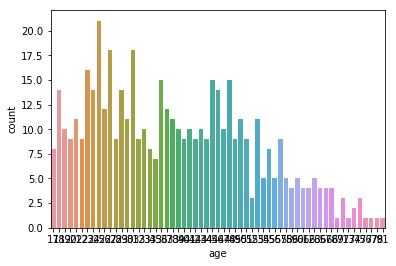

In [15]:
sns.countplot(df.age)

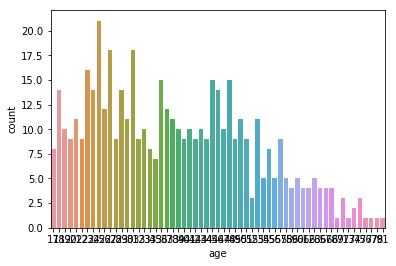

In [16]:
sns.countplot(x='age', data=df)

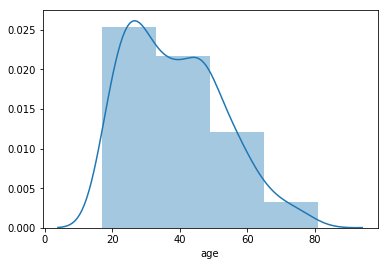

In [17]:
sns.distplot(df.age, bins=4)

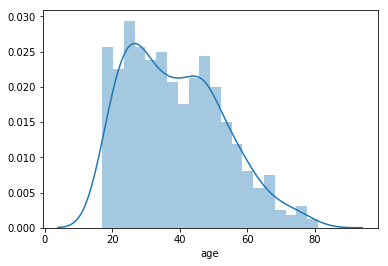

In [18]:
sns.distplot(df.age, bins=20)

**education**

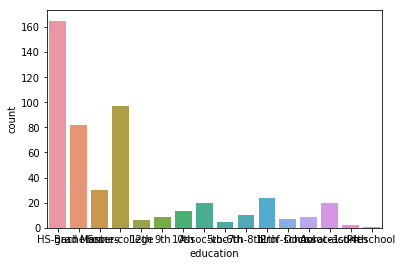

In [19]:
sns.countplot(x='education', data=df)

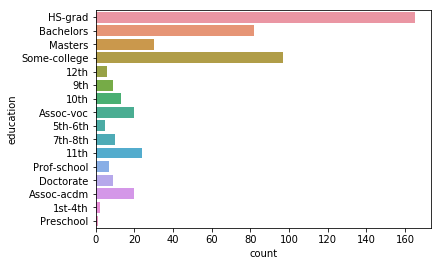

In [20]:
sns.countplot(y='education', data=df)

**race**

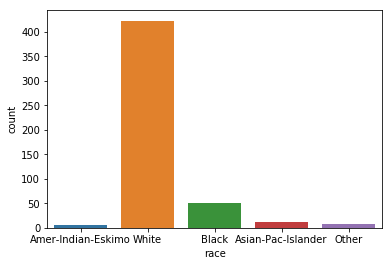

In [21]:
sns.countplot(x='race', data=df)

**discretized_age_EW, discretized_age_EF**

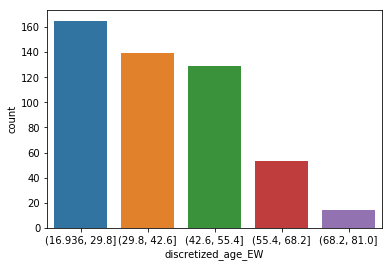

In [22]:
sns.countplot(x='discretized_age_EW', data=df2)

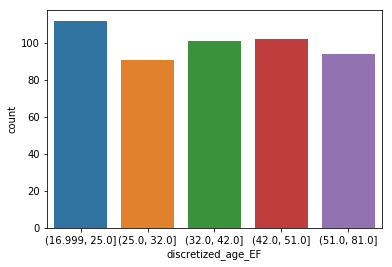

In [23]:
sns.countplot(x='discretized_age_EF', data=df2)

In [24]:
df2.groupby('discretized_age_EF').size()

discretized_age_EF
(16.999, 25.0]    112
(25.0, 32.0]       91
(32.0, 42.0]      101
(42.0, 51.0]      102
(51.0, 81.0]       94
dtype: int64

### One categorical vs one numeric variable

For each value of "marital.status", display the mean age

In [25]:
df['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

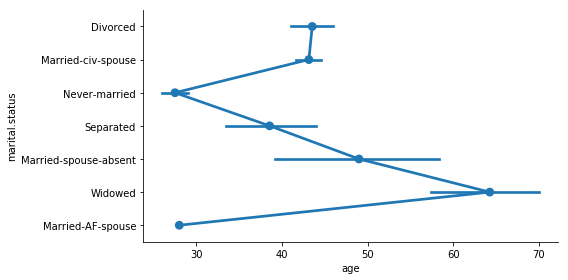

In [26]:
sns.factorplot(y='marital.status', data=df, x='age',aspect=2)

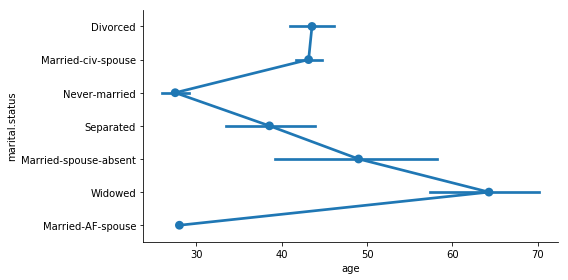

In [27]:
sns.factorplot(y='marital.status', data=df, x='age',\
               aspect=2, kind='point')

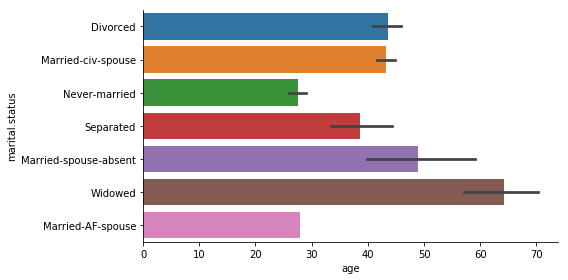

In [28]:
sns.factorplot(y='marital.status', data=df, x='age',\
               aspect=2, kind='bar')

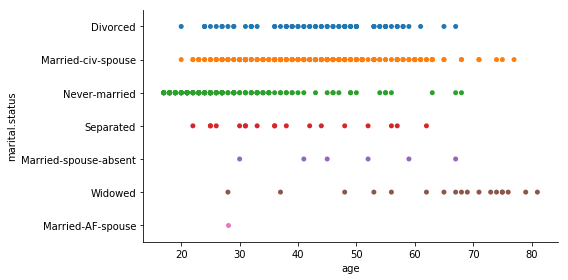

In [29]:
sns.factorplot(y='marital.status', data=df, x='age',\
               aspect=2, kind='strip')

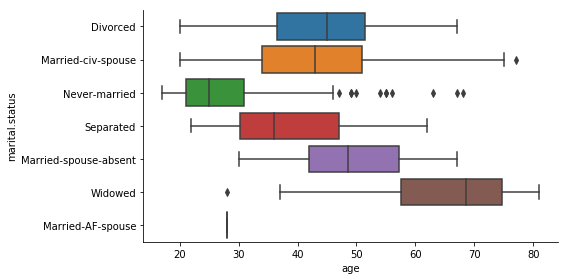

In [30]:
sns.factorplot(y='marital.status', data=df, x='age',\
               aspect=2, kind='box')

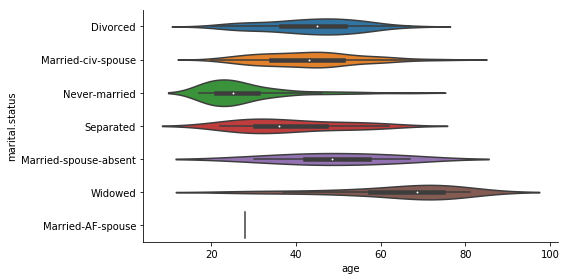

In [31]:
sns.factorplot(y='marital.status', data=df, x='age',\
               aspect=2, kind='violin')

### Two numeric variables (Regression)

A regression plot. Here there are no two numeric variables that are particularly strongly correlated

We want to assess whether education.num determines hours.per.week (how many hours per week)

In [32]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.044819,-0.003402,0.068986,0.067976,0.088779
fnlwgt,-0.044819,1.000000,0.014280,-0.035879,-0.058480,-0.019102
education.num,-0.003402,0.014280,1.000000,0.128262,0.143796,0.194980
capital.gain,0.068986,-0.035879,0.128262,1.000000,-0.026987,0.023619
capital.loss,0.067976,-0.058480,0.143796,-0.026987,1.000000,0.052463
hours.per.week,0.088779,-0.019102,0.194980,0.023619,0.052463,1.000000


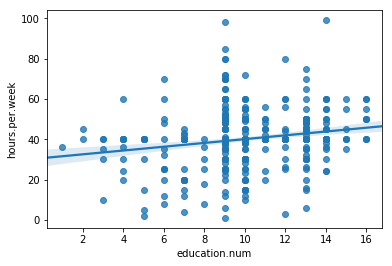

In [33]:
sns.regplot(x='education.num', y='hours.per.week', data=df)

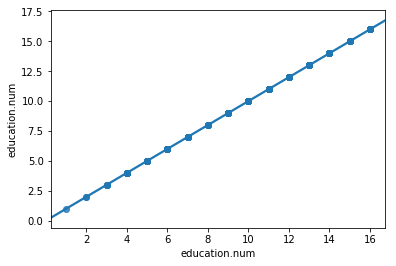

In [34]:
sns.regplot(x='education.num', y='education.num', data=df)

### Two categorical variables vs one numeric variable

Show the mean age by sex and marital status

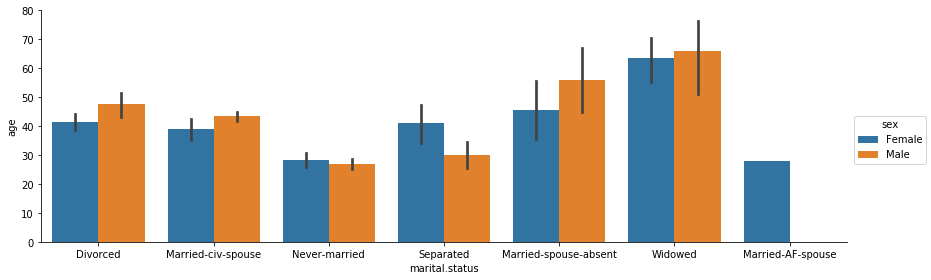

In [35]:
sns.factorplot(x='marital.status', y='age',hue='sex', data=df, \
               kind='bar',aspect=3)

### Two numeric (age, education.num) and one categorical variables (sex)

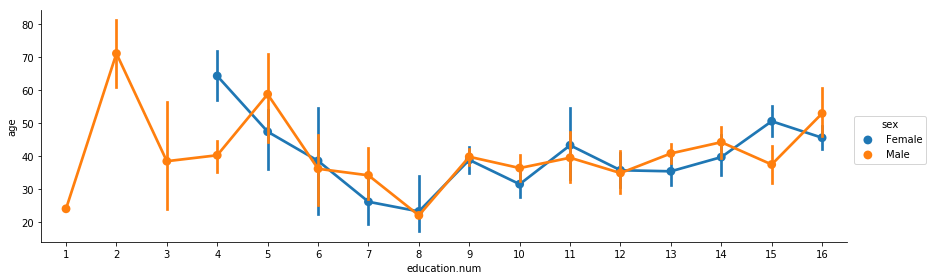

In [36]:
sns.factorplot(x='education.num', y='age',hue='sex', data=df,aspect=3)

### Two categorical (better if ordinal) variables and one numeric variable

Find average capital gain for age and education.num

In [37]:
gr = df2.groupby(['education.num','discretized_age_EF'])\
    ['capital.gain'].mean()

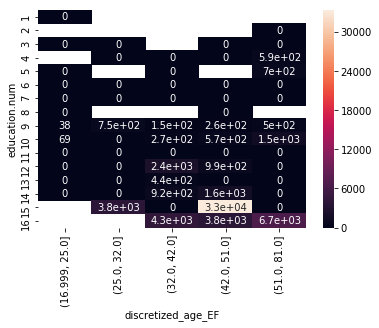

In [38]:
sns.heatmap(gr.unstack(),annot=True)

### Four variables: two numeric and two categorical

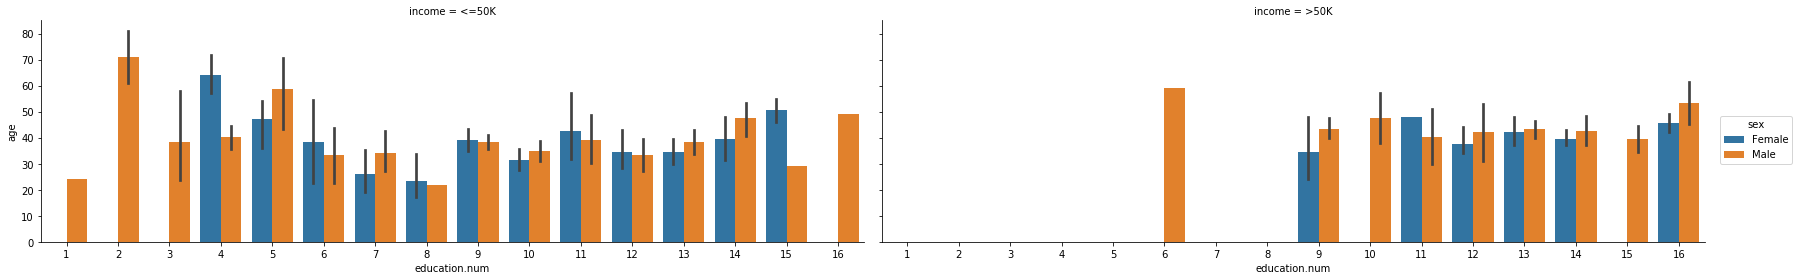

In [39]:
sns.factorplot(x='education.num',y='age',hue='sex',col='income',\
               data=df,kind='bar',aspect=3)

### Four variables: one numeric and three categorical

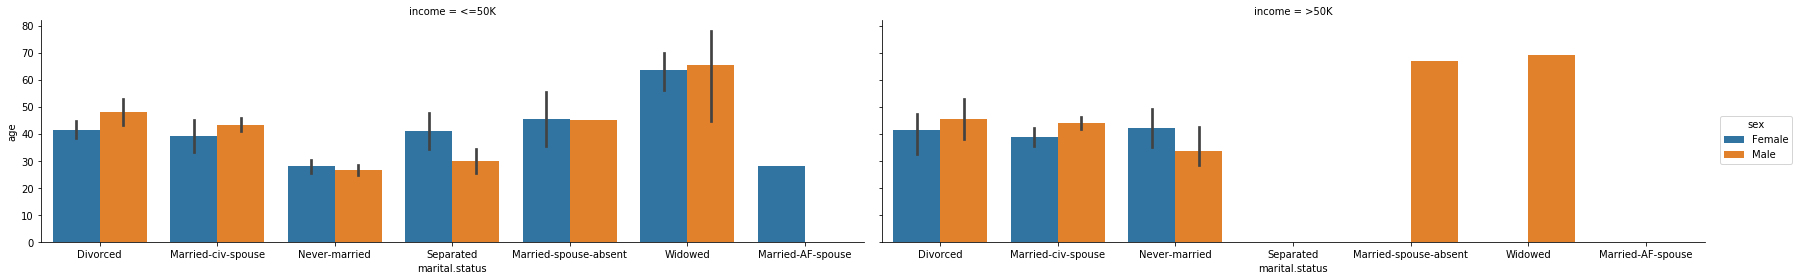

In [40]:
sns.factorplot(x='marital.status',y='age',hue='sex',col='income', data=df,kind='bar',aspect=3)

### n numeric variables (Pairplots)

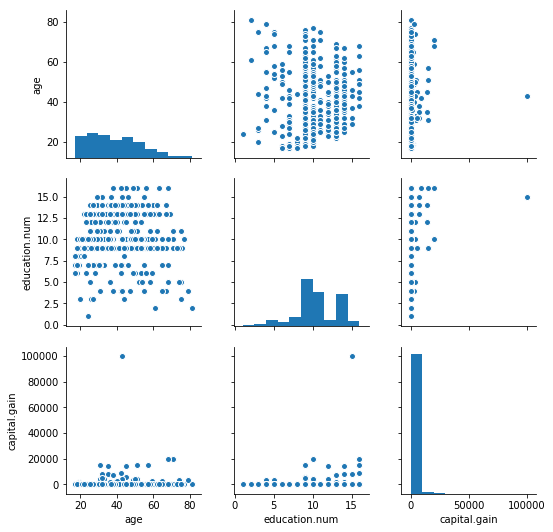

In [41]:
sns.pairplot(df[['age','education.num','capital.gain']])